# Modeling two-phase systems
Before we begin modelling different forms of biomass we first need to consider the enviroment in which these organisms will thrive. Our previous models were mainly concerned with only a single liquid phase where the impact that these systems would have on their coresponding gas phase is minimal. The system we are aiming to model is expected to have a considerable impact on its coresponding gas phase and as a result we need to consider some gas-liquid interactions.

To simplify things we will first consider a completely inorganic system with atmospheric condtions like our own and no oxidised nitrogen. This gives the oppurtunity to look an inorganic part of the nitrogen cycle which will most likely not find its way into our later models.

## Inorganic nitrogen fixation.
The process through which Nitrogen is fixated by the environment consist out of three reaction steps. The first two reactions occur during thunder storm, where the lightning stikes serves to provide the energy for oxidizing nitrogen into nitrogen oxides.

$$ N_2 + O_2 \rightarrow 2NO $$
$$ 2NO + O_2 \rightarrow 2NO_2 $$

The second step occurs after the resulting nitrogen dioxide gas cools down. Upon which the gas reacts with water to form nitrous and nitric acid to achieve an equilibrium.https://doi.org/10.1021/ie50552a048

$$ 2NO_2 + H_2O \rightleftharpoons HNO_2 + HNO_3 $$ 

For further simplicity we will assume that this reaction is complete and that a negible amount of Nitrogen oxides remain in the gas phase. As a result we can combine these three reactions into one overall first order rate beased reaction, which is dependant on the amount of lightining present.

$$ N_2 + 2O_2 + H_2O \rightarrow HNO_2 + HNO_3 $$

$$\frac{dN_{i}}{dT} = \zeta_i$$

In [1]:
import numpy as np
def Storm(ζ):
    return np.array([0,0,0,0,0,-ζ,-2*ζ,0,-1*ζ,0,0,ζ,ζ])


## Environment
Now that we have a simple rate based phenomena, which affects components in both the liquid and the gas phase, we can simulate what happens to nitrogen during a thunderstorm. To do this we first need to pay some attention to our environment. The environment which we have chosen aims to immiate a 5 $m^3$ section of open ocean water and 15 $m^3$ of air. The system is completely seperated from the rest of the world, with the exception that light is able to pass through it.
![title](environment.png)
In this system we make several assumptions:
1. Only the compounds $N_2$,$O_2$ and $CO_2$ are in gas form.
2. All gasses are ideal.
3. Gasses dissolved in water obeys Henry's law.
4. Solutes, present in the liquid, does not affect the liquid volume.
5. A constant temperature of $25 ^oC$

### Order of compononents
In these models we will only concern ourselves with 13 different forms of matter: 5 forms of biomas, 3 gasses, 3 nitrogen based compounds, water and sugar. To keep things uniform the compounds will always be represented in code in this specific order.

$$N_{total} = [X_1,X_2,X_3,X_4,X_5,N_2,O_2,CO_2,H_2O,G,NH_4,NO_2,NO_3]\space(mol\space or\space cmol)$$
$$C_{liquid} = [C_{X_1},C_{X_2},C_{X_3},C_{X_4},C_{X_5},C_{N_2},C_{O_2},C_{CO_2},C_{H_2O},C_{G},C_{NH_4},C_{NO_2},C_{NO_3}]   \space(\frac{mol}{m^3}\space or\space \frac{cmol}{m^3})$$
$$P_i = [P_{O_2},P_{CO_2},P_{N_2}]$$

Sections of the model which only concerns itself with a specific subset of these compounds will have spacers for the missing compounds. Refer to the $Storm(\zeta)$ function above for further clarity.

#### Environmental Parameters

In [2]:
Vt =20 #m3
T = 25 +273.15 #C
R = 8.314 

#### Molar Density

In [3]:
ρ_h20 = 997000/18 # mol/m3

#### Henry's constants

In [4]:
H_N2 = 6.4*10**-6
H_O2 = 1.3*10**-5
H_CO2 = 3.3*10**-4
H_N2O = 2.4*10**-4
H_NO = 1.9*10**-5
H_NO2 = 1.2*10**-4

### Time triggered events
In our first simulation we will simulate a strong thunder storm for 40 hours followed by 10 hours with no storm.

In [5]:
def t40(t):
    if t <= 40:
        return 1
    else:
        return 0

### The Environment

In [15]:
def Conc(N):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH4,NO2,NO3 = N
    p_O2,p_CO2,p_N2 = Pressure(N)
    
    Vl = H2O/ρ_h20
    C_O2  = H_O2*p_O2
    C_CO2 = H_CO2*p_CO2
    C_N2  = H_N2*p_N2
    
    C_X1   = X1/Vl
    C_NH4 = NH4/Vl 
    C_G   = G/Vl
    C_NO2 = NO2/Vl
    C_NO3 = NO3/Vl
    
    C_X1 = X1/Vl
    C_X2 = X2/Vl
    C_X3 = X3/Vl
    C_X4 = X4/Vl
    C_X5 = X5/Vl
    C_H2O = 1
    return np.array([C_X1,C_X2,C_X3,C_X4,C_X5,C_N2,C_O2,C_CO2,C_H2O,C_G,C_NH4,C_NO2,C_NO3])

def Pressure(N):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH4,NO2,NO3 = N
    Vl = H2O/ρ_h20
    Vg = Vt - Vl
    n_gas = O2 + CO2 + N2 
    P = n_gas*R*T/Vg
    p_O2,p_CO2,p_N2 = O2/n_gas*P, CO2/n_gas*P, N2/n_gas*P
    return np.array([p_O2,p_CO2,p_N2])

def S1(N,t):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH4,NO2,NO3 = N
    C = Conc(N)

    # Time triggered change in environment
    ζ = t40(t)
    
    #Processes/Organisms
    D1 = Storm(ζ)
    
    Change = D1
    return Change

In [ ]:
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [53]:
tmax = 50
tspan = np.arange(0,tmax,1)
n= 650
IN = [0,0,0,0,0,0.79*n,0.2*n,0.01*n,ρ_h20*5,0,0,0,0]
N = odeint(S1,IN,tspan).T

There we have our first simulation, next we will produce a function which will help us visualise our simulations.

In [54]:
def Illistrate(N,tspan,tmax,light,storm):
    X1,X2,X3,X4,X5,N2,O2,CO2,H2O,G,NH3,NO2,NO3 = N
    Vl = H2O/ρ_h20
    #Gas phase
    N_gas = N2 + O2 + CO2
    plt.plot(tspan,N2*100/N_gas,label = '$N_2$')
    plt.plot(tspan,O2*100/N_gas,label = '$O_2$')
    plt.plot(tspan,CO2*100/N_gas,label = '$CO_2$')
    plt.ylim(0,100)
    plt.xlim(0,tmax)
    plt.ylabel('Gas percentage')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()
    

    
    #Concentrations
    C = Conc(N)/1000 #cmol/L
    
    #Biomass
    x1 = np.amax(C[0])
    x2 = np.amax(C[1])
    x3 = np.amax(C[2])
    x4 = np.amax(C[3])
    x5 = np.amax(C[4])
    xm = max([x1,x2,x3,x4,x5])
    plt.plot(tspan,C[0],label = '$X_1$')
    plt.plot(tspan,C[1],label = '$X_2$')
    plt.plot(tspan,C[2],label = '$X_3$')
    plt.plot(tspan,C[3],label = '$X_4$')
    plt.plot(tspan,C[4],label = '$X_5$')
    plt.ylim(0,10)
    if xm !=0:
        plt.ylim(0,xm*1.1)
    plt.xlim(0,tmax)
    plt.ylabel('Biomass (cmol/L)')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()  
    
    x1 = np.amax(C[10])
    x2 = np.amax(C[11])
    x3 = np.amax(C[12])
    xm = max([x1,x2,x3])
    plt.plot(tspan,C[10],label = '$NH_4$')
    plt.plot(tspan,C[11],label = '$NO_2$')
    plt.plot(tspan,C[12],label = '$NO_3$')
    plt.ylim(0,10)
    if xm !=0:
        plt.ylim(0,xm*1.1)
    plt.xlim(0,tmax)
    plt.ylabel('Concentration (cmol/L)')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()  
    
    xm = np.amax(C[9])
    plt.plot(tspan,C[9],label = '$Glucose$')
    if light != None:
        plt.plot(tspan,[light(i)*xm/50 for i in tspan],label = '$Light$')
    plt.ylim(0,10)
    if xm !=0:
        plt.ylim(0,xm*1.1)
    plt.xlim(0,tmax)
    plt.ylabel('Concentration (cmol/L)')
    plt.xlabel('Time (h)')
    plt.legend(loc = 0)
    plt.show()

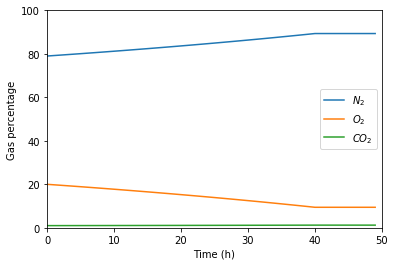

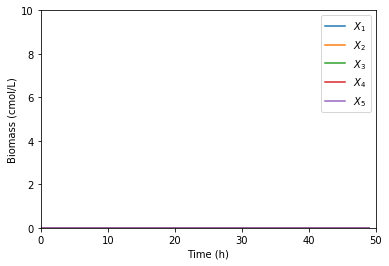

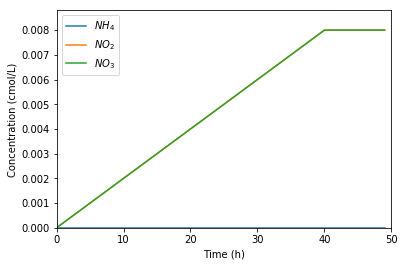

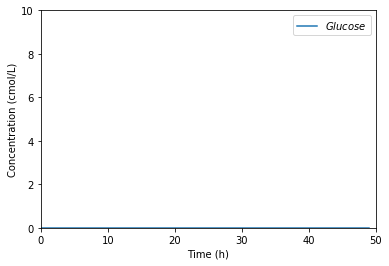

In [55]:
Illistrate(N,tspan,tmax,None,None)